# Classification for ODFM Dataset

This notebook uses ODFM dataset for training customized EffiecientNet models. the dataset consists of 120K samples for 12 classes to be classifed, so there are 10K samples for each class


### Importing libraries


In [2]:
from efficientnet.efficientnet import efficientnet_b0, efficientnet_b2,efficientnet_b4, efficientnet_b5
from xcit.xcit import xcit_nano, xcit_tiny12
import torch
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from torch import optim
from tqdm import tqdm
import torch.nn.functional as F
import torchsig.transforms as ST
import numpy as np
import torchsig
import os
import shutil
from torch.utils.data import Subset
from Train_evaluate import *
from sigODFM import Sig53
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from torch import nn, optim


----
### Data Reading


In [3]:
selected_classes= [
        "ofdm-64",
        "ofdm-72",
        "ofdm-128",
        "ofdm-180",
        "ofdm-256",
        "ofdm-300",
        "ofdm-512",
        "ofdm-600",
        "ofdm-900",
        "ofdm-1024",
        "ofdm-1200",
        "ofdm-2048",
    ]

In [4]:
# Specify Sig53 Options
root = "../../../../data/torchsig/ODFM_imp/"
train = True
impaired = True
class_list = list(Sig53._idx_to_name_dict.values())
transform = ST.Compose([
    ST.RandomPhaseShift(phase_offset=(-1, 1)),
    ST.Normalize(norm=np.inf),
    ST.ComplexTo2D(),
])
target_transform = ST.DescToClassIndex(class_list=class_list)

# Instantiate the Sig53 Clean Training Dataset
sig53_clean_train = Sig53(
    root=root,
    train=train,
    impaired=impaired,
    transform=transform,
    target_transform=target_transform,
    use_signal_data=True,
)

# Instantiate the Sig53 Clean Validation Dataset
train = False
sig53_clean_val = Sig53(
    root=root,
    train=train,
    impaired=impaired,
    transform=transform,
    target_transform=target_transform,
    use_signal_data=True,
)

# Retrieve a sample and print out information to verify
idx = np.random.randint(len(sig53_clean_train))
data, label = sig53_clean_train[idx]
print("Dataset length: {}".format(len(sig53_clean_train)))
print("Data shape: {}".format(data.shape))
print("Label Index: {}".format(label))
print("Label Class: {}".format(Sig53.convert_idx_to_name(label)))

Dataset length: 360000
Data shape: (2, 4096)
Label Index: 3
Label Class: ofdm-180


----
### Dataloaders

In [5]:
# Calculate the size of the validation set (10% of the training set)
val_size = int(0.1 * len(sig53_clean_train))
train_size = len(sig53_clean_train) - val_size

# Split the training dataset into training and validation datasets
train_dataset, val_dataset = torch.utils.data.random_split(sig53_clean_train, [train_size, val_size])

# Create data loaders for training, validation, and testing
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=128,
    num_workers=8,
    shuffle=True,
    drop_last=True,
)
val_dataloader = DataLoader(
    dataset=val_dataset,
    batch_size=16,
    num_workers=8,
    shuffle=False,
    drop_last=True,
)
test_dataloader = DataLoader(
    dataset=sig53_clean_val,
    batch_size=16,
    num_workers=8,
    shuffle=False,
    drop_last=True,
)

----
### Call and Train Model
Loading the model structure to be trained

#### EffieicentNet B2

In [5]:
model = efficientnet_b2(
    pretrained=False,
    num_classes=len(selected_classes)
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [6]:
from torch import nn, optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 25

In [7]:
trainer = ModelTrainer(model, train_dataloader, val_dataloader, criterion, optimizer, device)
trainer.run_training_loop(num_epochs)

Epoch 1/25


Training: 100%|██████████| 2531/2531 [19:24<00:00,  2.17it/s, loss=2.0083, accuracy=25.32%]


Epoch 1: Train Loss 2.0083, Acc 25.32%, Val Loss 1.8173, Val Acc 32.76%
Epoch 2/25


Training: 100%|██████████| 2531/2531 [19:20<00:00,  2.18it/s, loss=1.7876, accuracy=34.28%]


Epoch 2: Train Loss 1.7876, Acc 34.28%, Val Loss 1.7662, Val Acc 36.92%
Epoch 3/25


Training: 100%|██████████| 2531/2531 [19:20<00:00,  2.18it/s, loss=1.7125, accuracy=37.75%]


Epoch 3: Train Loss 1.7125, Acc 37.75%, Val Loss 1.6667, Val Acc 39.98%
Epoch 4/25


Training: 100%|██████████| 2531/2531 [19:20<00:00,  2.18it/s, loss=1.6706, accuracy=39.53%]


Epoch 4: Train Loss 1.6706, Acc 39.53%, Val Loss 1.6526, Val Acc 40.79%
Epoch 5/25


Training: 100%|██████████| 2531/2531 [19:22<00:00,  2.18it/s, loss=1.6384, accuracy=40.91%]


Epoch 5: Train Loss 1.6384, Acc 40.91%, Val Loss 1.6317, Val Acc 41.32%
Epoch 6/25


Training: 100%|██████████| 2531/2531 [19:20<00:00,  2.18it/s, loss=1.6136, accuracy=42.03%]


Epoch 6: Train Loss 1.6136, Acc 42.03%, Val Loss 1.6081, Val Acc 42.16%
Epoch 7/25


Training: 100%|██████████| 2531/2531 [19:21<00:00,  2.18it/s, loss=1.5937, accuracy=42.79%]


Epoch 7: Train Loss 1.5937, Acc 42.79%, Val Loss 1.5893, Val Acc 43.21%
Epoch 8/25


Training: 100%|██████████| 2531/2531 [19:20<00:00,  2.18it/s, loss=1.5755, accuracy=43.54%]


Epoch 8: Train Loss 1.5755, Acc 43.54%, Val Loss 1.5812, Val Acc 43.68%
Epoch 9/25


Training: 100%|██████████| 2531/2531 [19:23<00:00,  2.18it/s, loss=1.5569, accuracy=44.37%]


Epoch 9: Train Loss 1.5569, Acc 44.37%, Val Loss 1.5485, Val Acc 44.80%
Epoch 10/25


Training: 100%|██████████| 2531/2531 [19:20<00:00,  2.18it/s, loss=1.5408, accuracy=45.01%]


Epoch 10: Train Loss 1.5408, Acc 45.01%, Val Loss 1.5486, Val Acc 44.65%
Epoch 11/25


Training: 100%|██████████| 2531/2531 [19:22<00:00,  2.18it/s, loss=1.5159, accuracy=45.86%]


Epoch 11: Train Loss 1.5159, Acc 45.86%, Val Loss 1.4933, Val Acc 45.84%
Epoch 12/25


Training: 100%|██████████| 2531/2531 [19:24<00:00,  2.17it/s, loss=1.4698, accuracy=46.89%]


Epoch 12: Train Loss 1.4698, Acc 46.89%, Val Loss 1.4631, Val Acc 47.06%
Epoch 13/25


Training: 100%|██████████| 2531/2531 [19:20<00:00,  2.18it/s, loss=1.4384, accuracy=47.95%]


Epoch 13: Train Loss 1.4384, Acc 47.95%, Val Loss 1.4453, Val Acc 47.61%
Epoch 14/25


Training: 100%|██████████| 2531/2531 [19:23<00:00,  2.18it/s, loss=1.4157, accuracy=48.78%]


Epoch 14: Train Loss 1.4157, Acc 48.78%, Val Loss 1.4200, Val Acc 48.39%
Epoch 15/25


Training: 100%|██████████| 2531/2531 [19:20<00:00,  2.18it/s, loss=1.3971, accuracy=49.44%]


Epoch 15: Train Loss 1.3971, Acc 49.44%, Val Loss 1.4133, Val Acc 48.86%
Epoch 16/25


Training: 100%|██████████| 2531/2531 [19:20<00:00,  2.18it/s, loss=1.3794, accuracy=50.02%]


Epoch 16: Train Loss 1.3794, Acc 50.02%, Val Loss 1.4360, Val Acc 48.23%
Epoch 17/25


Training: 100%|██████████| 2531/2531 [19:21<00:00,  2.18it/s, loss=1.3620, accuracy=50.77%]


Epoch 17: Train Loss 1.3620, Acc 50.77%, Val Loss 1.4106, Val Acc 48.61%
Epoch 18/25


Training: 100%|██████████| 2531/2531 [19:21<00:00,  2.18it/s, loss=1.3461, accuracy=51.41%]


Epoch 18: Train Loss 1.3461, Acc 51.41%, Val Loss 1.4189, Val Acc 48.71%
Stopping early due to no improvement in validation accuracy.
Loaded best model from best_model_checkpoint.pth


----
### Evaluation

Validation Loss: 1.4133
Validation Accuracy: 48.86%
Average Inference Time per Batch: 0.0263 seconds


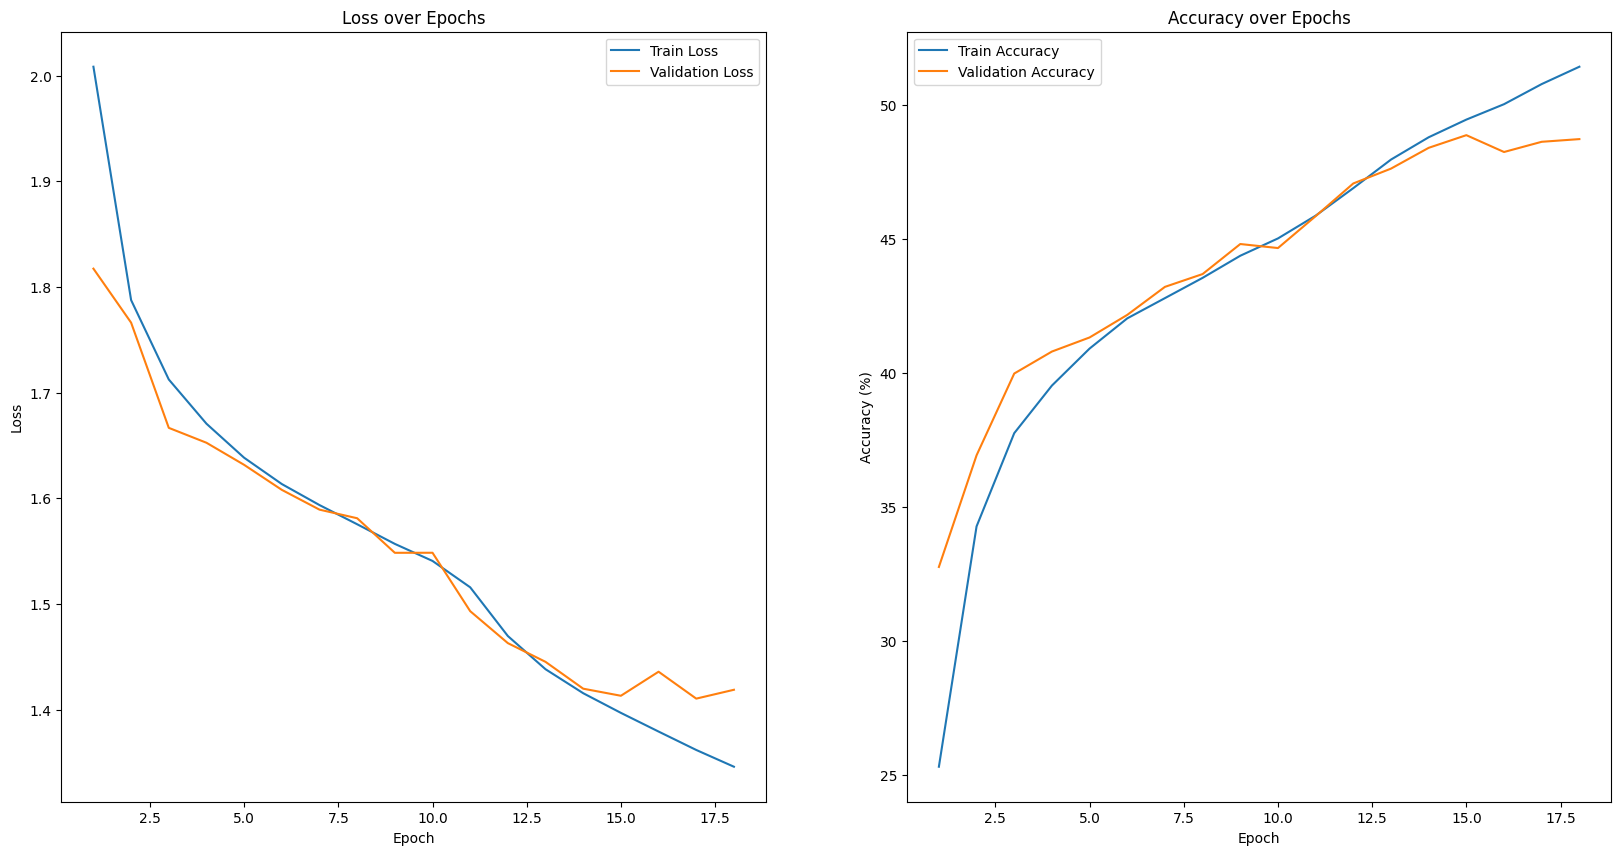

<Figure size 1500x1500 with 0 Axes>

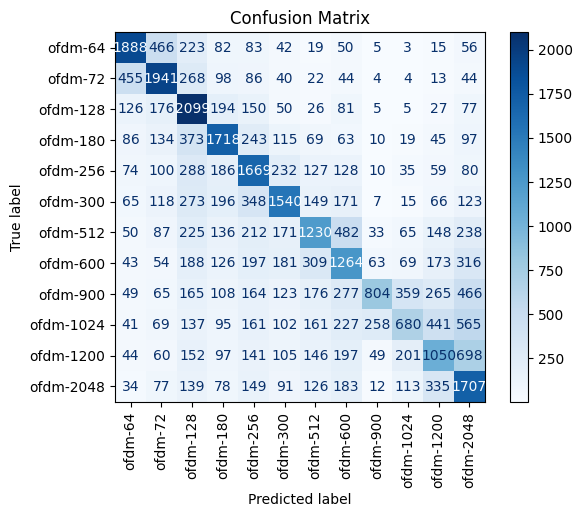

In [8]:
results = evaluate_model(trainer.model, trainer.val_dataloader, trainer.criterion, trainer.device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_metrics(trainer, labels, predictions)

plot_conf_matrix( labels, predictions,selected_classes)

In [9]:

report = classification_report(labels, predictions, target_names=selected_classes)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

     ofdm-64       0.64      0.64      0.64      2932
     ofdm-72       0.58      0.64      0.61      3019
    ofdm-128       0.46      0.70      0.56      3016
    ofdm-180       0.55      0.58      0.56      2972
    ofdm-256       0.46      0.56      0.51      2988
    ofdm-300       0.55      0.50      0.53      3071
    ofdm-512       0.48      0.40      0.44      3077
    ofdm-600       0.40      0.42      0.41      2983
    ofdm-900       0.64      0.27      0.38      3021
   ofdm-1024       0.43      0.23      0.30      2937
   ofdm-1200       0.40      0.36      0.38      2940
   ofdm-2048       0.38      0.56      0.45      3044

    accuracy                           0.49     36000
   macro avg       0.50      0.49      0.48     36000
weighted avg       0.50      0.49      0.48     36000



#### EfficientNet B4

In [ ]:
## changing batch size to 64 instead of 128 due to lack of memory
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    num_workers=8,
    shuffle=True,
    drop_last=True,
)


In [ ]:
model = efficientnet_b4(
    pretrained=False,
    num_classes=len(selected_classes)
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)



In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 25

In [7]:
trainer = ModelTrainer(model, train_dataloader, val_dataloader, criterion, optimizer, device)
trainer.run_training_loop(num_epochs)


Epoch 1/25


Training:   0%|          | 0/5062 [00:00<?, ?it/s]

Training: 100%|██████████| 5062/5062 [37:20<00:00,  2.26it/s, loss=1.9833, accuracy=26.69%]


Epoch 1: Train Loss 1.9833, Acc 26.69%, Val Loss 1.8021, Val Acc 34.11%
Epoch 2/25


Training: 100%|██████████| 5062/5062 [37:20<00:00,  2.26it/s, loss=1.7578, accuracy=36.15%]


Epoch 2: Train Loss 1.7578, Acc 36.15%, Val Loss 1.6923, Val Acc 39.20%
Epoch 3/25


Training: 100%|██████████| 5062/5062 [37:18<00:00,  2.26it/s, loss=1.6763, accuracy=39.76%]


Epoch 3: Train Loss 1.6763, Acc 39.76%, Val Loss 1.6153, Val Acc 41.86%
Epoch 4/25


Training: 100%|██████████| 5062/5062 [37:18<00:00,  2.26it/s, loss=1.6322, accuracy=41.62%]


Epoch 4: Train Loss 1.6322, Acc 41.62%, Val Loss 1.5786, Val Acc 43.75%
Epoch 5/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.5976, accuracy=43.15%]


Epoch 5: Train Loss 1.5976, Acc 43.15%, Val Loss 1.5663, Val Acc 44.08%
Epoch 6/25


Training: 100%|██████████| 5062/5062 [37:18<00:00,  2.26it/s, loss=1.5690, accuracy=44.20%]


Epoch 6: Train Loss 1.5690, Acc 44.20%, Val Loss 1.5375, Val Acc 45.34%
Epoch 7/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.5438, accuracy=45.29%]


Epoch 7: Train Loss 1.5438, Acc 45.29%, Val Loss 1.5212, Val Acc 46.31%
Epoch 8/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.5237, accuracy=46.11%]


Epoch 8: Train Loss 1.5237, Acc 46.11%, Val Loss 1.4893, Val Acc 47.57%
Epoch 9/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.5016, accuracy=47.10%]


Epoch 9: Train Loss 1.5016, Acc 47.10%, Val Loss 1.4801, Val Acc 47.93%
Epoch 10/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.4834, accuracy=47.74%]


Epoch 10: Train Loss 1.4834, Acc 47.74%, Val Loss 1.4627, Val Acc 48.73%
Epoch 11/25


Training: 100%|██████████| 5062/5062 [37:20<00:00,  2.26it/s, loss=1.4679, accuracy=48.38%]


Epoch 11: Train Loss 1.4679, Acc 48.38%, Val Loss 1.4581, Val Acc 48.56%
Epoch 12/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.4513, accuracy=48.89%]


Epoch 12: Train Loss 1.4513, Acc 48.89%, Val Loss 1.4414, Val Acc 49.27%
Epoch 13/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.4334, accuracy=49.57%]


Epoch 13: Train Loss 1.4334, Acc 49.57%, Val Loss 1.4402, Val Acc 49.32%
Epoch 14/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.4140, accuracy=50.08%]


Epoch 14: Train Loss 1.4140, Acc 50.08%, Val Loss 1.4164, Val Acc 49.91%
Epoch 15/25


Training: 100%|██████████| 5062/5062 [37:18<00:00,  2.26it/s, loss=1.3914, accuracy=50.82%]


Epoch 15: Train Loss 1.3914, Acc 50.82%, Val Loss 1.3996, Val Acc 50.48%
Epoch 16/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.3733, accuracy=51.35%]


Epoch 16: Train Loss 1.3733, Acc 51.35%, Val Loss 1.4204, Val Acc 49.94%
Epoch 17/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.3570, accuracy=51.99%]


Epoch 17: Train Loss 1.3570, Acc 51.99%, Val Loss 1.3967, Val Acc 50.57%
Epoch 18/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.3413, accuracy=52.52%]


Epoch 18: Train Loss 1.3413, Acc 52.52%, Val Loss 1.3972, Val Acc 50.79%
Epoch 19/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.3263, accuracy=53.06%]


Epoch 19: Train Loss 1.3263, Acc 53.06%, Val Loss 1.3800, Val Acc 51.25%
Epoch 20/25


Training: 100%|██████████| 5062/5062 [37:20<00:00,  2.26it/s, loss=1.3115, accuracy=53.60%]


Epoch 20: Train Loss 1.3115, Acc 53.60%, Val Loss 1.3702, Val Acc 51.65%
Epoch 21/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.2954, accuracy=54.23%]


Epoch 21: Train Loss 1.2954, Acc 54.23%, Val Loss 1.3850, Val Acc 51.17%
Epoch 22/25


Training: 100%|██████████| 5062/5062 [37:19<00:00,  2.26it/s, loss=1.2814, accuracy=54.71%]


Epoch 22: Train Loss 1.2814, Acc 54.71%, Val Loss 1.3859, Val Acc 51.30%
Epoch 23/25


Training:  43%|████▎     | 2193/5062 [16:11<21:04,  2.27it/s, loss=1.2574, accuracy=55.62%]

In [ ]:
results = evaluate_model(trainer.model, trainer.val_dataloader, trainer.criterion, trainer.device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_metrics(trainer, labels, predictions)

plot_conf_matrix( labels, predictions,selected_classes)

In [14]:
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    num_workers=8,
    shuffle=True,
    drop_last=True,
)


In [15]:
model = xcit_nano(
    pretrained=False,
    num_classes=len(selected_classes)
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)



In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 25

In [17]:
trainer = ModelTrainer(model, train_dataloader, val_dataloader, criterion, optimizer, device)
trainer.run_training_loop(num_epochs)


Epoch 1/25


Training:   0%|          | 0/20250 [00:00<?, ?it/s]


RuntimeError: CUDA error: CUBLAS_STATUS_ALLOC_FAILED when calling `cublasCreate(handle)`

In [6]:
model = efficientnet_b5(
    pretrained=False,
    num_classes=len(selected_classes)
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
